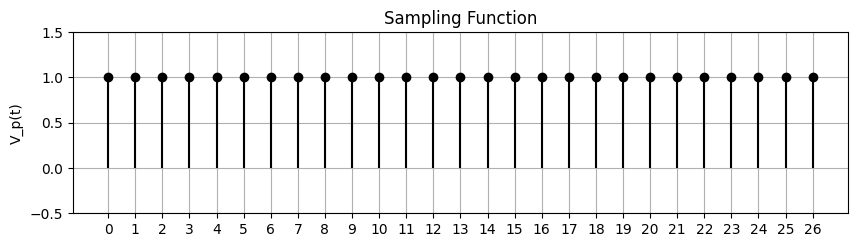

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = np.arange(0, 27, 1)  # Time vector (discrete steps) adjusted to 27 elements
analog_signal = np.array([2, 1.8, 1.4, 0.8, 0.3, -0.2, -0.7, -1.1, -1.4, -1.5, -1.6, -1.5, -1.2, -0.8,
                          -0.3, 0.2, 0.6, 0.9, 1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])  # Sampled analog signal (27 elements)
initial_delta = 0.1  # Small initial step size for better accuracy

# Initialize variables
dm_signal = np.zeros_like(t, dtype=float)  # Delta modulated signal
reconstructed_signal = np.zeros_like(t, dtype=float)  # Reconstructed signal
transmitted_bits = np.zeros_like(t, dtype=float)  # Store transmitted bits

# Initial conditions
dm_signal[0] = analog_signal[0]  # Start delta modulated signal from the first value of analog_signal
reconstructed_signal[0] = dm_signal[0]  # Initialize reconstructed signal

# Delta Modulation Process to closely match analog_signal
for i in range(1, len(t)):
    # Calculate the difference between the current analog value and the previous dm_signal value
    diff = analog_signal[i] - dm_signal[i-1]

    # Adjust delta dynamically based on the difference to allow precise following
    delta = abs(diff) * 0.9  # Scale delta to be close to diff without overshooting

    # Move the dm_signal in the direction of analog_signal
    if diff > 0:
        dm_signal[i] = dm_signal[i-1] + delta  # Move up by the adjusted delta
        transmitted_bits[i] = 1  # Transmit bit '1'
    else:
        dm_signal[i] = dm_signal[i-1] - delta  # Move down by the adjusted delta
        transmitted_bits[i] = -1  # Transmit bit '0' as -1 to show below the axis

    # Update the reconstructed signal
    reconstructed_signal[i] = dm_signal[i]

# Plotting
plt.figure(figsize=(10, 8))

# Plot Sampling Function
plt.subplot(3, 1, 1)
# Remove the 'use_line_collection' argument
# If using Matplotlib version 3.3 or higher, and experiencing performance issues, consider upgrading.
plt.stem(t, np.ones_like(t), 'k', markerfmt='ko', basefmt=" ")
plt.title('Sampling Function')
plt.ylabel('V_p(t)')
plt.ylim([-0.5, 1.5])
plt.xticks(np.arange(0, 27, 1))
plt.grid(True)

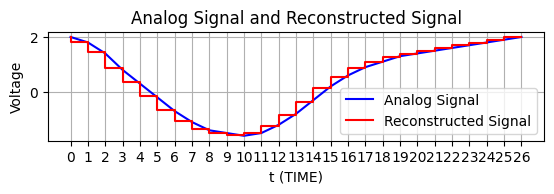

In [5]:
# Plot Analog Signal and Reconstructed Signal in the same subplot
plt.subplot(3, 1, 2)
plt.plot(t, analog_signal, linewidth=1.5, color='b', label='Analog Signal')  # Original analog signal in blue
plt.step(t, reconstructed_signal, linewidth=1.5, color='r', label='Reconstructed Signal')  # Reconstructed signal in red closely matching analog signal
plt.title('Analog Signal and Reconstructed Signal')
plt.ylabel('Voltage')
plt.xlabel('t (TIME)')
plt.xticks(np.arange(0, 27, 1))
plt.legend()
plt.grid(True)





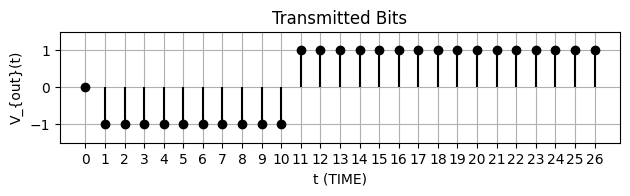

In [8]:
# Plot Transmitted Bits with bits shown below the axis for '0'
plt.subplot(3, 1, 3)
# Remove 'use_line_collection=True' to make it compatible with older Matplotlib versions
plt.stem(t, transmitted_bits, 'k', markerfmt='ko', basefmt=" ")
plt.title('Transmitted Bits')
plt.ylabel('V_{out}(t)')
plt.xlabel('t (TIME)')
plt.ylim([-1.5, 1.5])
plt.xticks(np.arange(0, 27, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# THANKS
